# Bulldozers Bluebook Price Prediction

In [1]:
# Creating Data Dictionary
data_dict = {
    'SalesID': 'unique identifier of a particular sale of a machine at auction',
     'MachineID': 'identifier for a particular machine; machines may have multiple sales',
     'ModelID': 'identifier for a unique machine model (i.e. fiModelDesc)',
     'datasource': 'source of the sale record; some sources are more diligent about reporting attributes of the machi..',
     'auctioneerID': 'identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the sam..',
     'YearMade': 'year of manufacturer of the Machine',
     'MachineHoursCurrentMeter' : 'current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have b...',
     'UsageBand':'value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage...',
     'Saledate':'time of sale',
    'Saleprice':'cost of sale in USD',
    'fiModelDesc':'Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDes...',
    'fiBaseModel':'disaggregation of fiModelDesc',
    'fiSecondaryDesc':'disaggregation of fiModelDesc',
    'fiModelSeries':'disaggregation of fiModelDesc',
    'fiModelDescriptor':'disaggregation of fiModelDesc',
    'ProductSize':'The size class grouping for a product group. Subsets within product group.',
    'ProductClassDesc':'description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc',
    'State':'US State in which sale occurred',
    'ProductGroup':'identifier for top-level hierarchical grouping of fiModelDesc',
    'ProductGroupDesc':'description of top-level hierarchical grouping of fiModelDesc',
    'Drive_System':'machine configuration; typcially describes whether 2 or 4 wheel drive',
    'Enclosure':'machine configuration - does machine have an enclosed cab or not',
    'Forks':'machine configuration - attachment used for lifting',
    'Pad_Type':'machine configuration - type of treads a crawler machine uses',
    'Ride_Control':'machine configuration - optional feature on loaders to make the ride smoother',
    'Stick':'machine configuration - type of control',
    'Transmission':'machine configuration - describes type of transmission; typically automatic or manual',
    'Turbocharged':'machine configuration - engine naturally aspirated or turbocharged',
    'Blade_Extension':'machine configuration - extension of standard blade',
    'Blade_Width':'machine configuration - width of blade',
    'Enclosure_Type':'machine configuration - does machine have an enclosed cab or not',
    'Engine_Horsepower':'machine configuration - engine horsepower rating',
    'Hydraulics':'machine configuration - type of hydraulics',
    'Pushblock':'machine configuration - option',
    'Ripper':'machine configuration - implement attached to machine to till soil',
    'Scarifier':'machine configuration - implement attached to machine to condition soil',
    'Tip_control':'machine configuration - type of blade control',
    'Tire_Size':'machine configuration - size of primary tires',
    'Coupler':'machine configuration - type of implement interface',
    'Coupler_System':'machine configuration - type of implement interface',
    'Grouser_Tracks':'machine configuration - describes ground contact interface',
    'Hydraulics_Flow':'machine configuration - normal or high flow hydraulic system',
    'Track_Type':'machine configuration - type of treads a crawler machine uses',
    'Undercarriage_Pad_Width':'machine configuration - width of crawler treads',
    'Stick_Length':'machine configuration - length of machine digging implement',
    'Thumb':'machine configuration - attachment used for grabbing',
    'Pattern_Changer':'machine configuration - can adjust the operator control configuration to suit the user',
    'Grouser_Type':'machine configuration - type of treads a crawler machine uses',
    'Backhoe_Mounting':'machine configuration - optional interface used to add a backhoe attachment',
    'Blade_Type':'machine configuration - describes type of blade',
    'Travel_Controls':'machine configuration - describes operator control configuration',
    'Differential_Type':'machine configuration - differential type, typically locking or standard',
    'Steering_Controls':'machine configuration - describes operator control configuration'}

In [2]:
# Setting up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# Train data with target
train = pd.read_csv('TrainAndValid.csv', 
                    low_memory= False, 
                    parse_dates=['saledate'])
# Test data without the target
test = pd.read_csv('Test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [6]:
train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

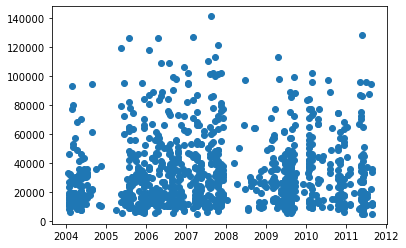

In [7]:
fig, ax = plt.subplots()
ax.scatter(train.saledate[:1000], train.SalePrice[:1000])

<AxesSubplot:>

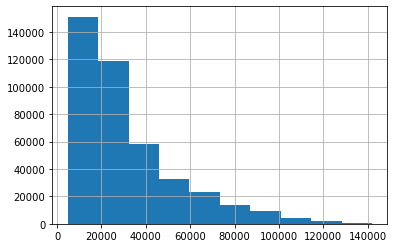

In [8]:
train.SalePrice.hist()

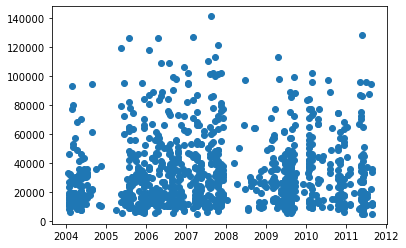

In [9]:
fig, ax = plt.subplots()
ax.scatter(train.saledate[:1000], train.SalePrice[:1000]);

In [10]:
train.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
train.sort_values(by = ['saledate'], inplace = True, ascending = True)
train.saledate.head(5)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
# Making a copy of the original data
train_temp = train.copy()

In [13]:
# Adding date parameters as columns
train_temp['saleYear'] = train_temp.saledate.dt.year
train_temp['saleMonth'] = train_temp.saledate.dt.month
train_temp['saleDay'] = train_temp.saledate.dt.day
train_temp['saleDayoftheweek'] = train_temp.saledate.dt.dayofweek
train_temp['saleDayoftheyear'] = train_temp.saledate.dt.dayofyear
# Drop original saledate
train_temp.drop('saledate', axis = 1, inplace = True)

### 5. Modelling

In [19]:
# Checking for datatyper
train_temp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [20]:
# Checking for missing values
train_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

#### Converting strings to categories 

In [21]:
train_temp.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [22]:
pd.api.types.is_string_dtype(train_temp.UsageBand)

True

In [23]:
# Checking for strings
for label, content in train_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
# Turning all strings into category value
for label, content in train_temp.items():
    if pd.api.types.is_string_dtype(content):
        train_temp[label] = content.astype('category').cat.as_ordered()

In [29]:
# Testing if there is still a string
for label, content in train_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [34]:
train_temp.state.cat.categoriesories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [43]:
# Seeing the percentage of missing data - lot's of missing data
print((train_temp.isna().sum()/len(train_temp))* 100)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [48]:
# Save Processed Data
train_temp.to_csv('train_temp.csv', index = False)

### Filing numerical values first

In [50]:
for label, content in train_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayoftheweek
saleDayoftheyear


In [51]:
# Check for which numeric columns have null values
for label, content in train_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [53]:
# Fill numeric rows with the median
for label, content in train_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not 
            train_temp[label + '_is_missing'] = pd.isnull(content)
            # Filling with the mean
            train_temp[label] = content.fillna(content.median())    

### Filling and turning categorical variables to numbers

In [54]:
# Check columns which aren't numeric BUT are missing
for label, content in train_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [55]:
# Turning categorical variables into numbers
for label, content in train_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_temp[label + '_is_missing'] = pd.isnull(content)
        train_temp[label] = pd.Categorical(content).codes+1

In [56]:
# Checking if there is still missing data - guess not!
train_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Splitting data into train/validation sets

According to the Kaggle data page, the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like train_test_split() wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

In [61]:
train_val = train_temp[train_temp.saleYear == 2012]
train_train = train_temp[train_temp.saleYear != 2012 ]

In [70]:
# Split data into x and y
x_train,y_train = train_train.drop('SalePrice', axis = 1), train_train.SalePrice
x_valid, y_valid = train_val.drop('SalePrice', axis = 1), train_val.SalePrice

### Building an evaluation function

In [71]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_valid, y_valid)}
    return scores

### Testing our model on a subset (to tune hyperparameters)

In [75]:
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             max_samples = 1000)
model.fit(x_train, y_train)

RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

In [76]:
show_scores(model)

{'Training MAE': 7665.083066051727,
 'Valid MAE': 9132.679371813705,
 'Training RMSLE': 0.3411018319032423,
 'Valid RMSLE': 0.3762446378810512,
 'Training R^2': 0.7559381504200411,
 'Valid R^2': 0.7507358682022224}

In [77]:
model.score(x_train,y_train)

0.7559381504200411

### Hyperparameter tuning with RandomizedSearchCV

In [79]:
%time
rf_grid = {'n_estimators': np.arange(10,100,10),
          'max_depth':[None, 3,5,10],
          'min_samples_split':np.arange(1,20,2),
          'max_features':[0.5,1,'sqrt','auto'],
          'max_samples': [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 2,
                             cv = 5,
                             verbose = True)

rs_model.fit(x_train, y_train)


Wall time: 0 ns
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [80]:
# Finding the best model hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 15,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': 10}

In [81]:
show_scores(rs_model)

{'Training MAE': 8117.471859997658,
 'Valid MAE': 9627.225719826823,
 'Training RMSLE': 0.35801167327715094,
 'Valid RMSLE': 0.39199562657640863,
 'Training R^2': 0.7297908565299861,
 'Valid R^2': 0.7262450836792906}

### Train a model with the best hyperparameters
**Note**: These were found after a 100 iterations of `RandomizedSearchCV`

In [83]:
%time

ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs = -1,
                                   max_samples = None,
                                   random_state = 42)
ideal_model.fit(x_train,y_train)

Wall time: 0 ns


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [84]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.2452416398953833,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [85]:
show_scores(rs_model)

{'Training MAE': 8117.471859997658,
 'Valid MAE': 9627.225719826823,
 'Training RMSLE': 0.35801167327715094,
 'Valid RMSLE': 0.39199562657640863,
 'Training R^2': 0.7297908565299861,
 'Valid R^2': 0.7262450836792906}

## Make predictions on test data

In [91]:
# Import test data
df_test = pd.read_csv('Test.csv',
                     low_memory = False,
                     parse_dates = ['saledate'])
#Preprocessing data
def preprocessed_data(df):
    '''
    Performs transformations on df and returns transformed df
    '''
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayoftheweek'] = df.saledate.dt.dayofweek
    df['saleDayoftheyear'] = df.saledate.dt.dayofyear

    df.drop('saledate', axis = 1, inplace = True)

    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells if the data was missing our not 
                df[label + '_is_missing'] = pd.isnull(content)
                # Filling with the mean
                df[label] = content.fillna(content.median())   
                
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label + '_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [92]:
#Process test data
df_test = preprocessed_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [93]:
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [94]:
df_test['auctioneerID_is_missing'] = False

In [95]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [98]:
# Formating the way Kaggle wants
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test.SalesID
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [99]:
# Export prediction data
df_preds.to_csv('Test_predictions.cvs', index = False)

### Feature Importance

In [106]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features':columns,
                        'feature_importances': importances})
    .sort_values('feature_importances', ascending = False)
    .reset_index(drop = True))
    
    # Plot dataframe
    fig, ax = plt.subplots()
    ax.barh(df.features[:n], df.features_importances[:20])
    ax.set_ylabel('Features')
    ax.set_xlable('Feature Importance')

AttributeError: 'DataFrame' object has no attribute 'features_importances'

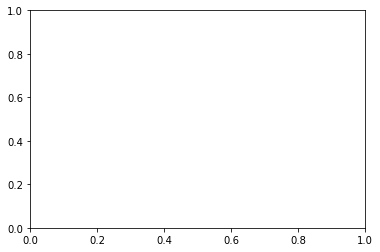

In [108]:
plot_features(x_train.columns, ideal_model.feature_importances_);